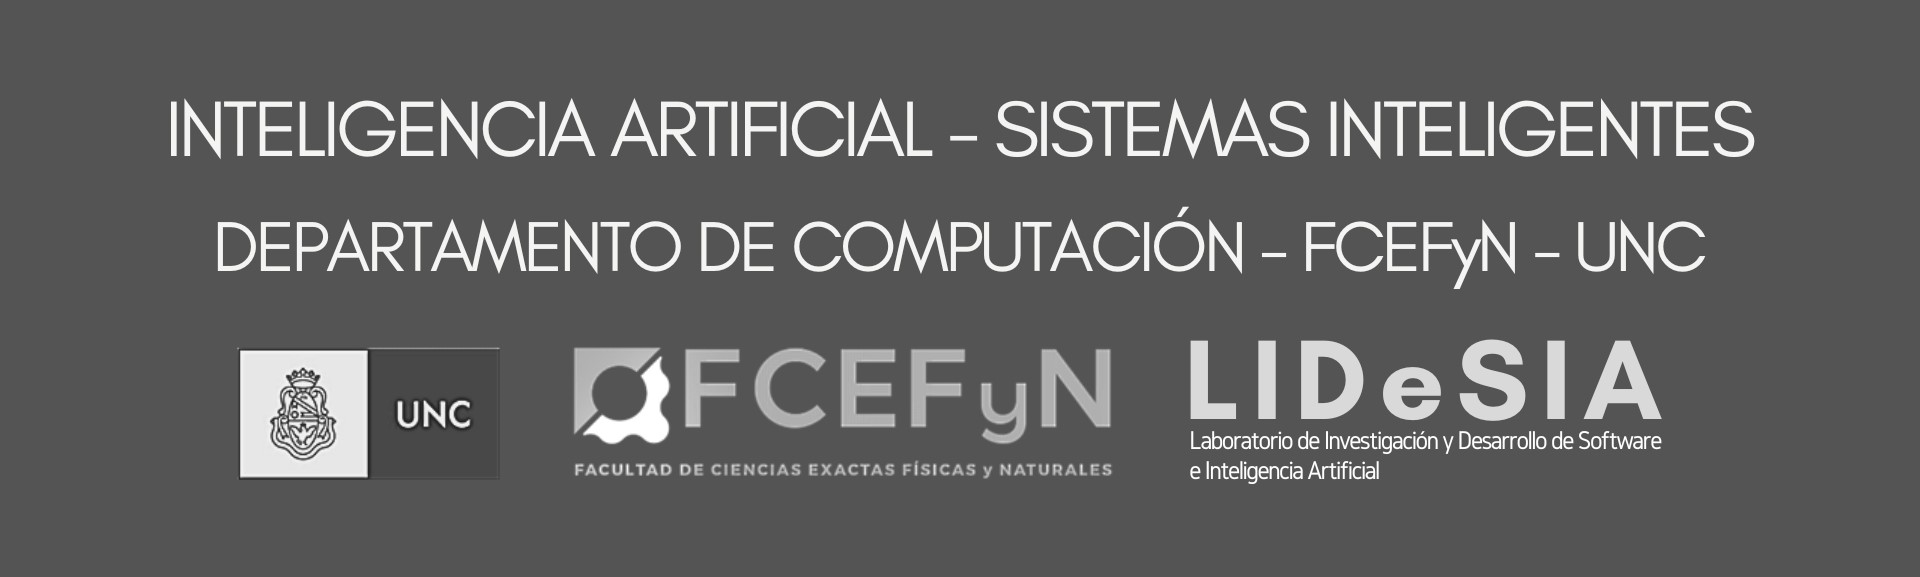

---

*   Autor/es: Lourdes Aybar (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---

In [ ]:
 !nvidia-smi

Mon Oct  9 00:48:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# Pip install

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Entrenamiento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/data.yaml epochs=25 imgsz=224 plots=True save=true

100% 6.23M/6.23M [00:00<00:00, 64.9MB/s]
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnost

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1696812971.8a6ba2e56d6a.3760.0  train_batch60.jpg
F1_curve.png					    train_batch61.jpg
labels_correlogram.jpg				    train_batch62.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


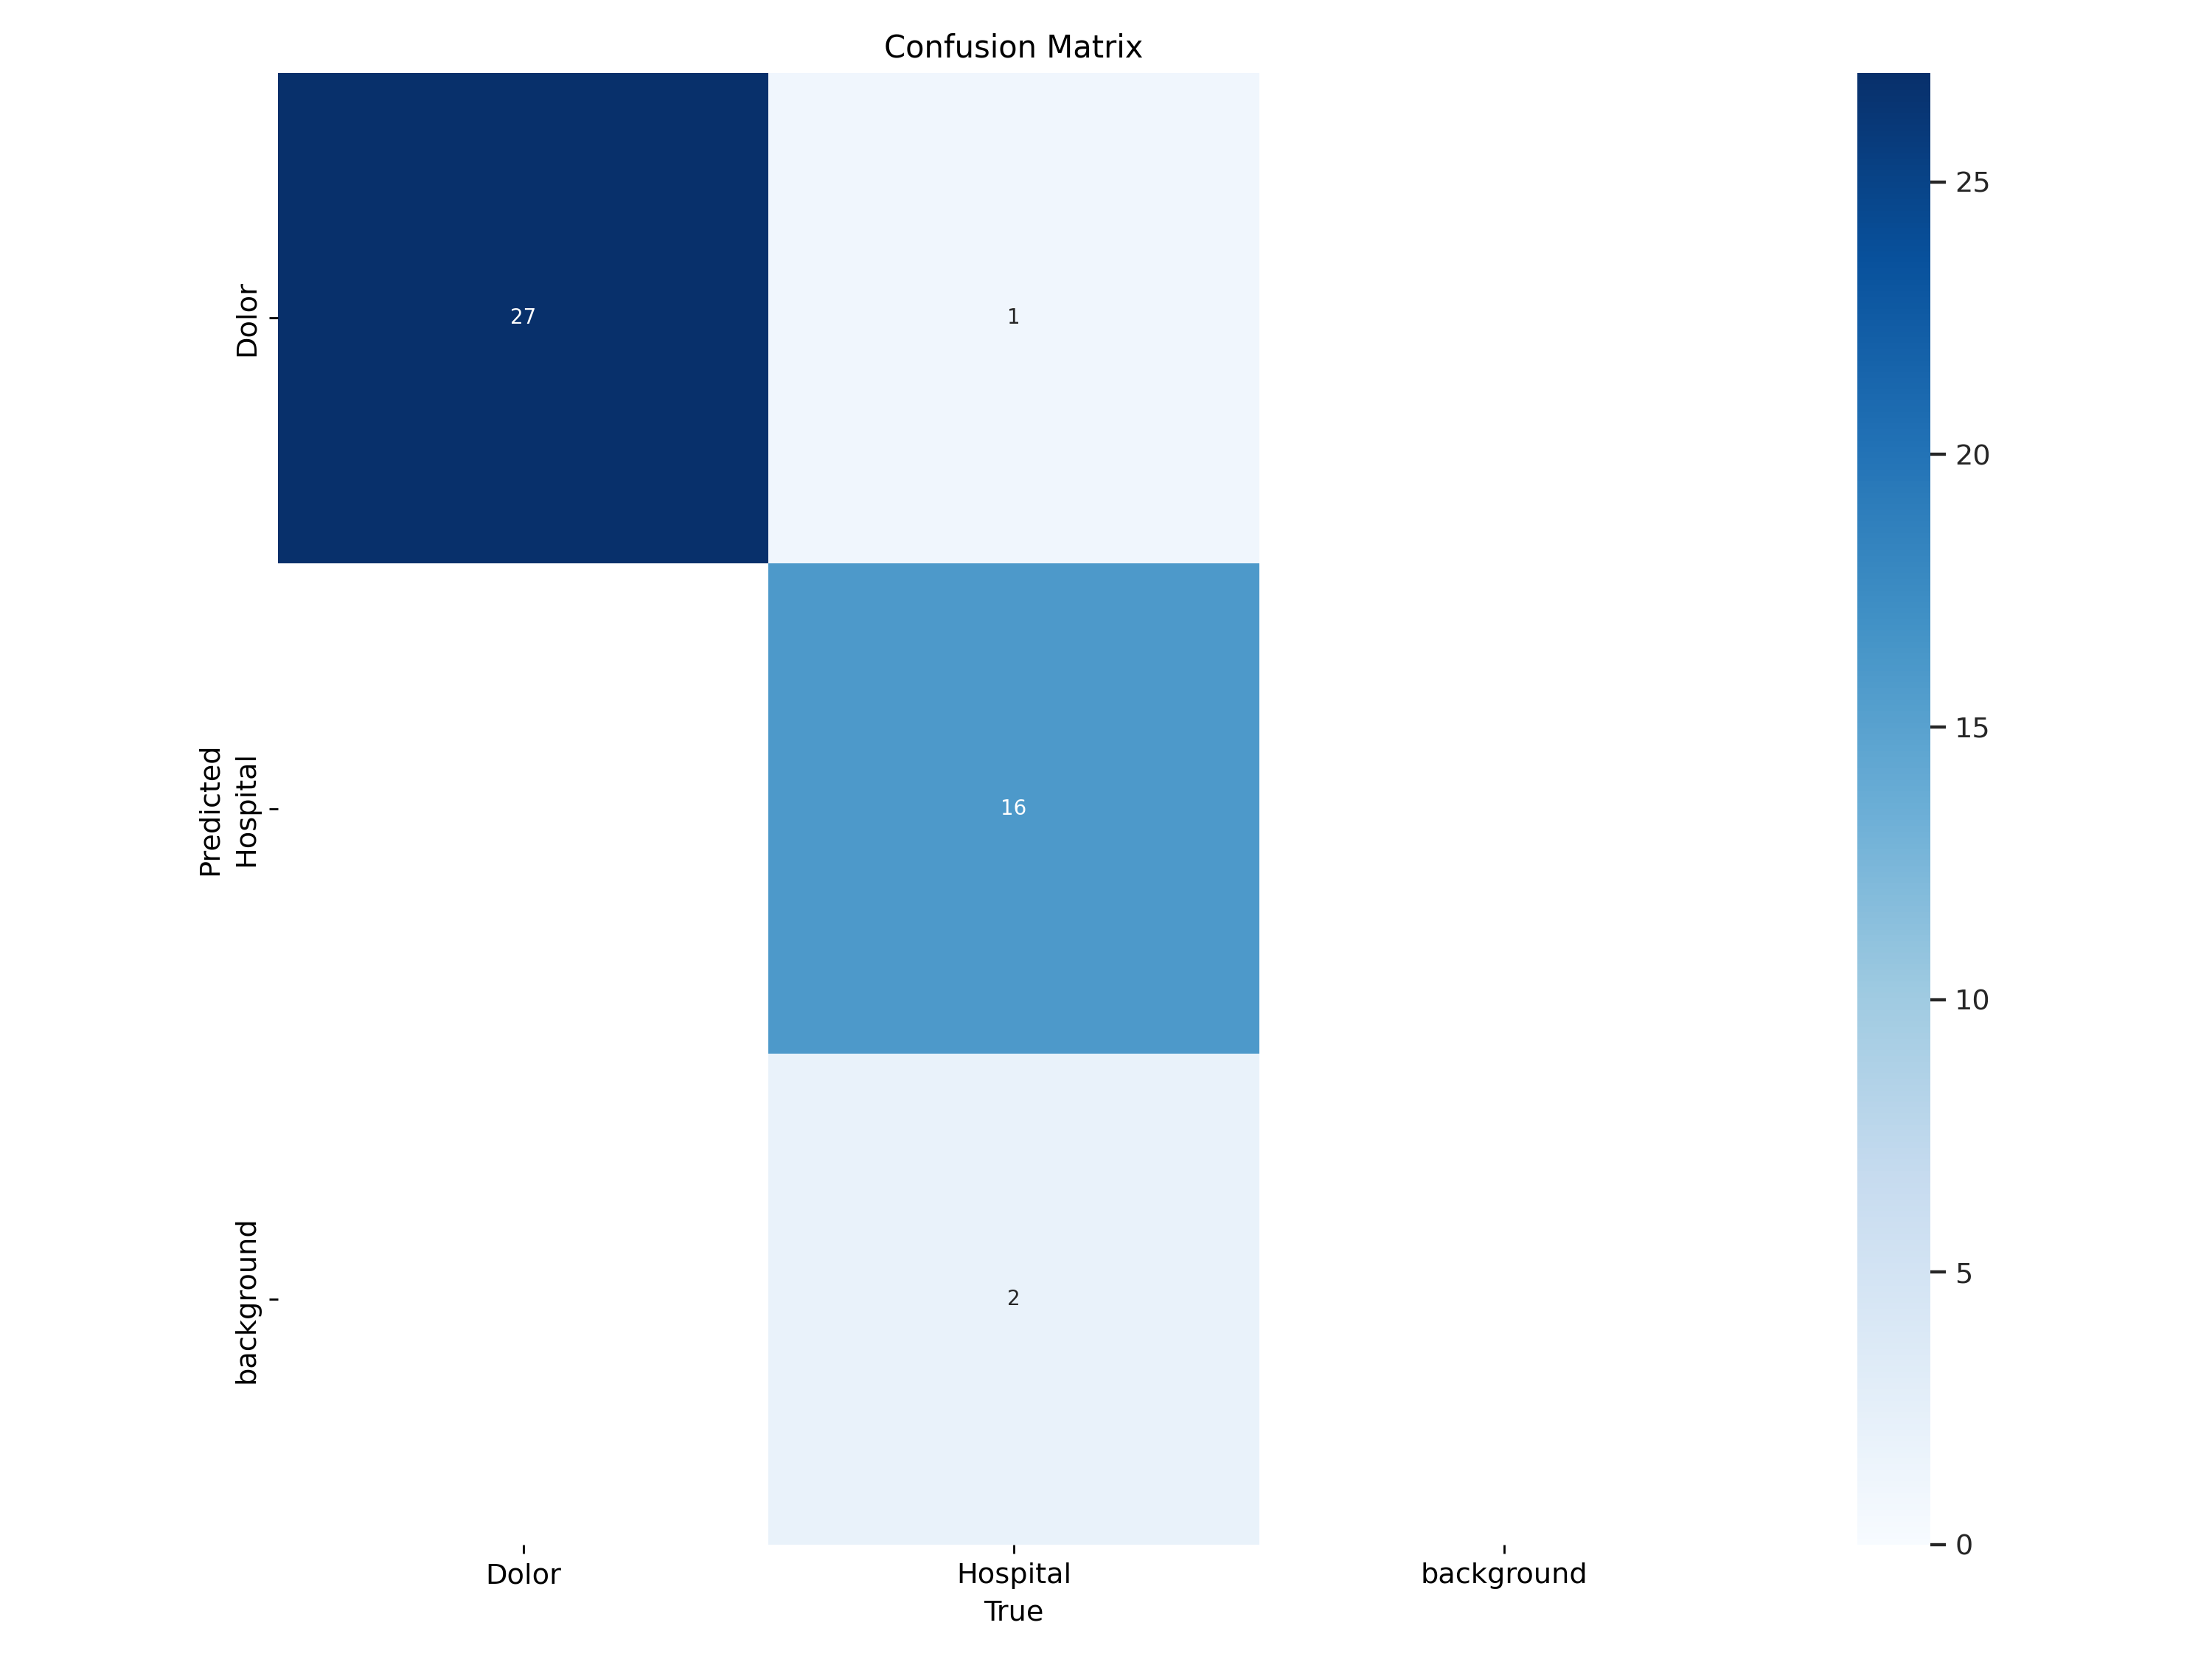

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

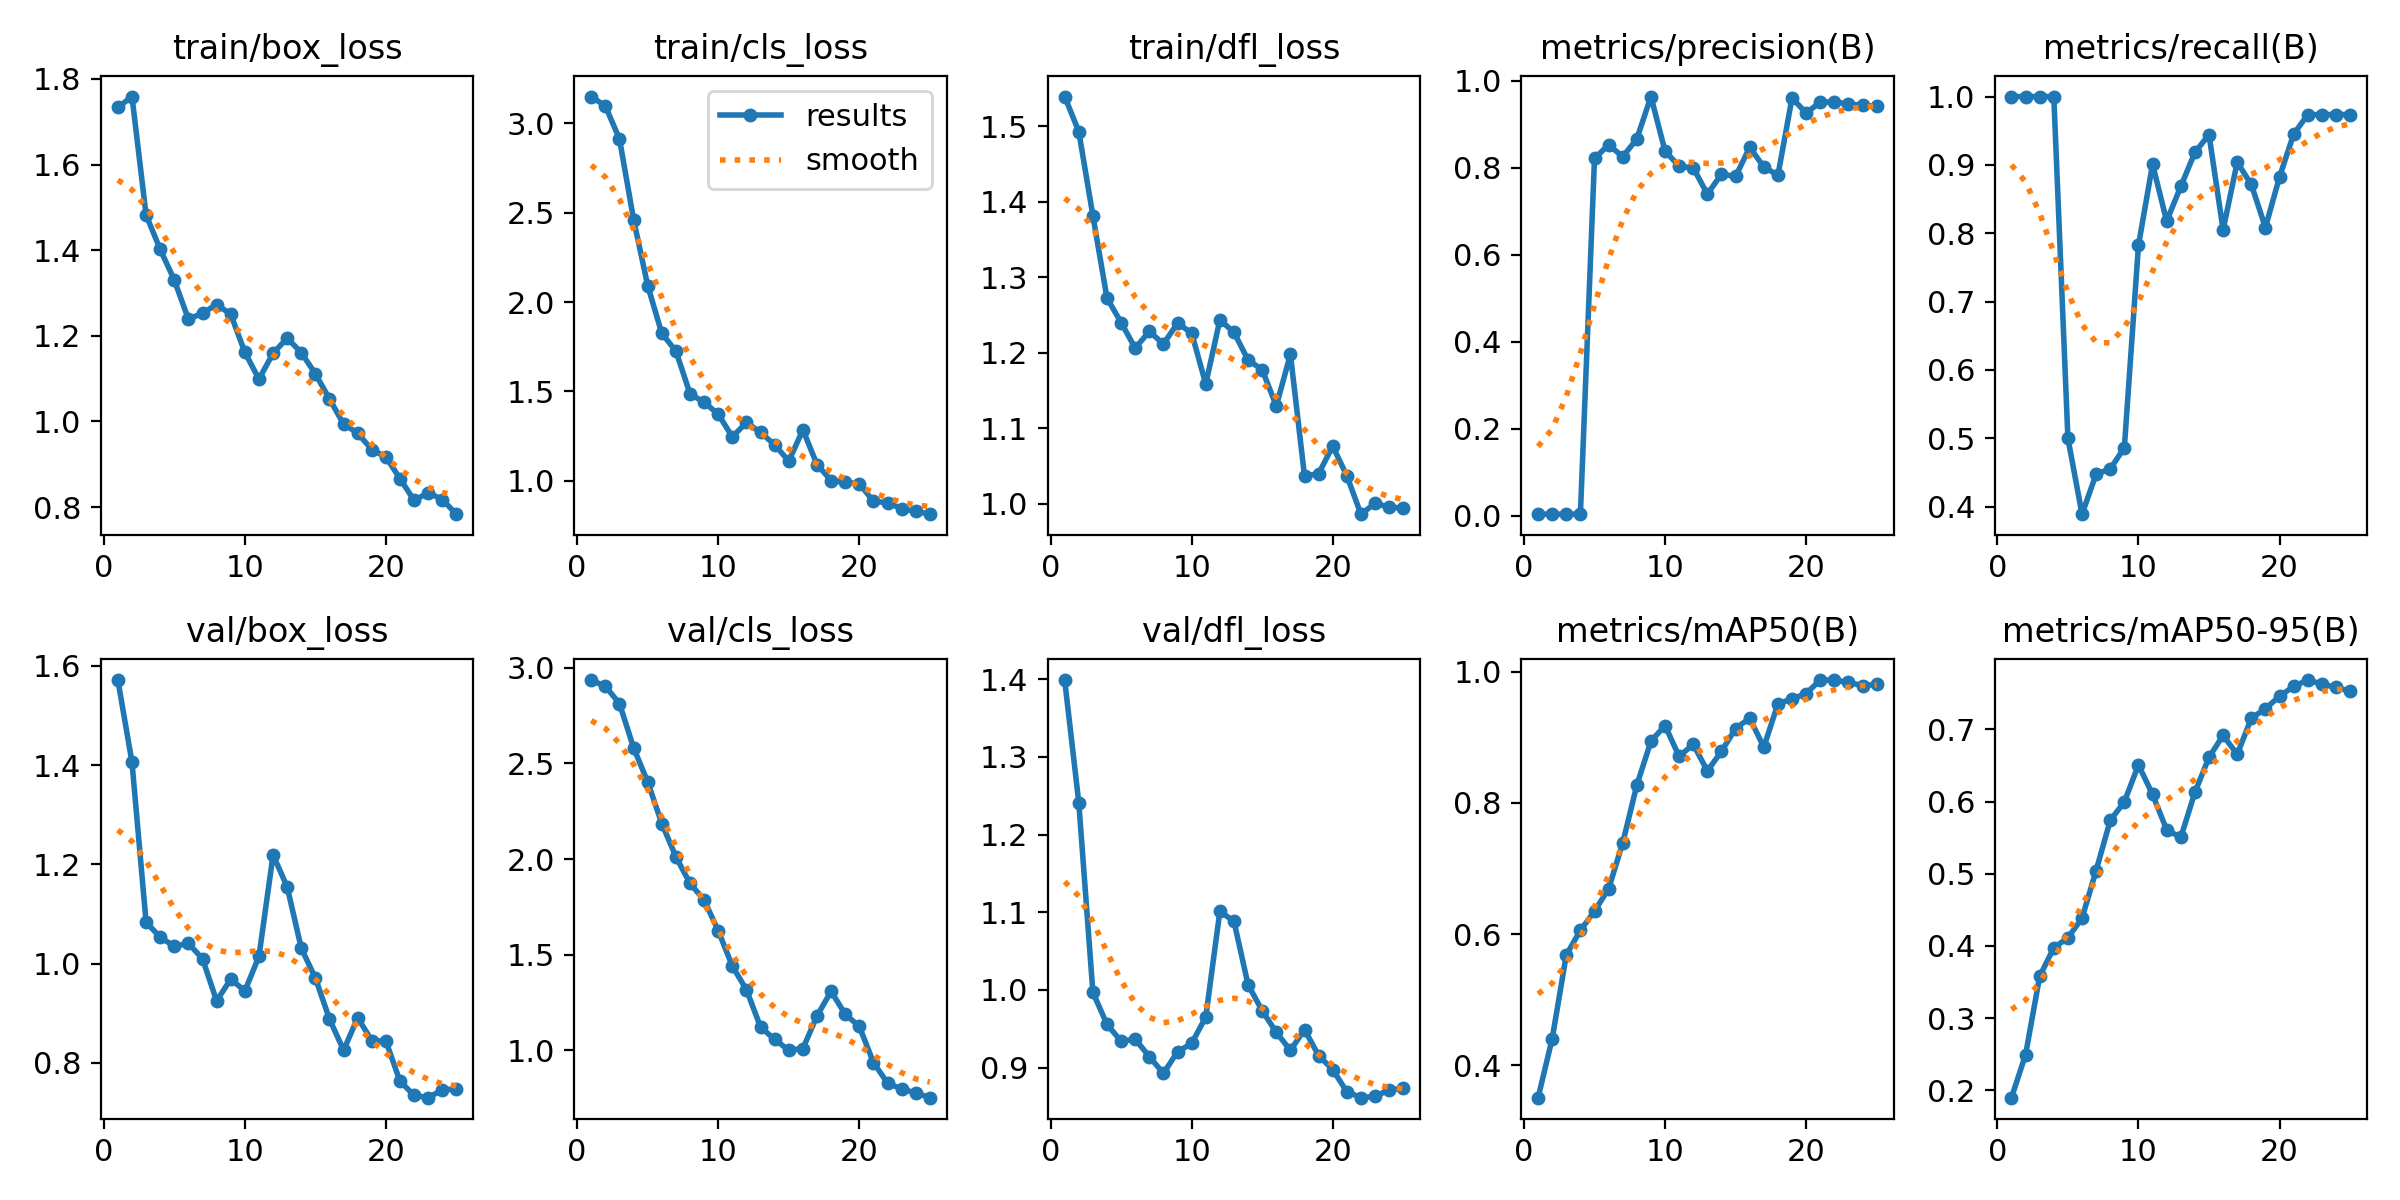

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

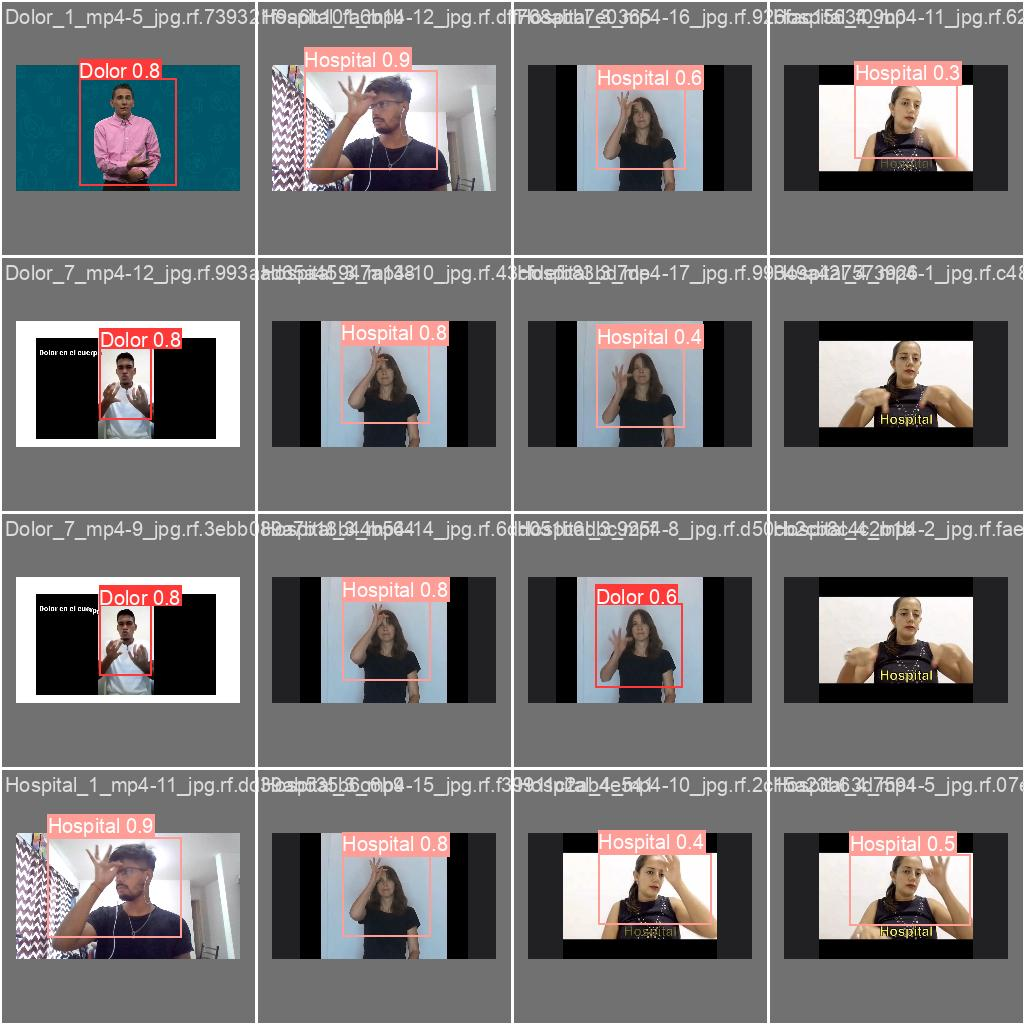

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Val

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/data.yaml

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/valid/labels.cache... 47 images, 1 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.31it/s]
                   all         47         46       0.95      0.963      0.986      0.774
                 Dolor         47         27        0.9          1      0.979      0.841
              Hospital         47         19          1      0.926      0.993      0.708
Speed: 1.0ms preprocess, 18.2ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Test

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4'

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 1 Dolor, 99.2ms
video 1/1 (2/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 1 Dolor, 8.0ms
video 1/1 (3/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 1 Dolor, 9.5ms
video 1/1 (4/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 1 Dolor, 9.9ms
video 1/1 (5/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 (no detections), 12.0ms
video 1/1 (6/234) /content/drive/Shareddrives/PROYECTO_INVESTIGACION_LSC/CODIGO/YOLOV8/data/test/images/Test_1.mp4: 224x128 1 D

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict8/Test_1.avi'


In [ ]:

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)